# Overtraining 2

This code is bases on Adrian Bevan's "NN_parabola - This is a Multilayer Perceptron (MLP) example using Keras" jupyter notebook 

In [108]:
import tensorflow as tf
import random
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Ntrain = 100
Ntest  = 1000
xmin   =-10
xmax   = 10
Noise  = 0.1
print("\033[92mGenerating the parabola data set\033[0m")
X_train = []
Y_train = []
X_test  = []
Y_test  = []


#--------------------------------------------------------------------
def sim_parabola(xmin, xmax, Noise):
    """
    Function to simulate a random data point for a parabola
    """
    x = random.random()*(xmax-xmin)+xmin
    y = x*x*(1+random.random()*Noise)
    
    return x, y
#--------------------------------------------------------------------
  
for i in range( Ntrain ):
  x,y = sim_parabola(xmin, xmax, Noise)
  X_train.append(x)
  Y_train.append(y)

for i in range( Ntest ):
  x,y = sim_parabola(xmin, xmax, Noise)
  X_test.append(x)
  Y_test.append(y)

# convert to nparrays
x_test  = np.array(X_test)
y_test  = np.array(Y_test)
x_train = np.array(X_train)
y_train = np.array(Y_train)

print("Have generated the following data:")
print("\tN(test)  = ", len(x_test))
print("\tN(train) = ", len(x_train))


Generating the parabola data set
Have generated the following data:
	N(test)  =  1000
	N(train) =  100


## Building the model

In [111]:
#
# Training configuration
#
ValidationSplit = 0.2
BatchSize       = 32
Nepochs         = 1000
#DropoutValue    = 0.2

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(300, input_dim=1, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  #tf.keras.layers.Dropout(DropoutValue),
  tf.keras.layers.Dense(1)
])


print("--------------------------------------------------------------------------------------------------------------")
print("\033[92mWill train a multilayer perceptron using some toy data following y = x^2\033[0m")
print("--------------------------------------------------------------------------------------------------------------\n\n")
print("Input data MNIST")
#print("2 layer MLP with configuration 1:128:128:1")
#print("Dropout values       = ", DropoutValue)
print("Leaky relu parameter =  0.1")
print("ValidationSplit      = ", ValidationSplit)
print("BatchSize            = ", BatchSize)
print("Nepochs              = ", Nepochs)

# now specify the loss function 
loss_fn = tf.keras.losses.MeanSquaredError()

# now we can train the model to make predictions.
#   Use the ADAM optimiser
#   Specify the metrics to report as accuracy
#   Specify the loss function (see above)
# the fit step specifies the number of training epochs
model.compile(optimizer='adam', loss=loss_fn)
history  = model.fit(x_train, y_train, validation_split=ValidationSplit, batch_size=BatchSize, epochs=Nepochs)

--------------------------------------------------------------------------------------------------------------
Will train a multilayer perceptron using some toy data following y = x^2
--------------------------------------------------------------------------------------------------------------


Input data MNIST
Leaky relu parameter =  0.1
ValidationSplit      =  0.2
BatchSize            =  32
Nepochs              =  1000
Train on 80 samples, validate on 20 samples
Epoch 1/1000
80/80 [==============================] - 1s 17ms/sample - loss: 2481.1690 - val_loss: 2482.3020
Epoch 2/1000
80/80 [==============================] - 0s 498us/sample - loss: 2378.6096 - val_loss: 2367.8369
Epoch 3/1000
80/80 [==============================] - 0s 307us/sample - loss: 2256.7958 - val_loss: 2222.7563
Epoch 4/1000
80/80 [==============================] - 0s 354us/sample - loss: 2113.7301 - val_loss: 2038.5300
Epoch 5/1000
80/80 [==============================] - 0s 353us/sample - loss: 1914.2679 - v

Epoch 72/1000
80/80 [==============================] - 0s 345us/sample - loss: 90.1518 - val_loss: 63.1862
Epoch 73/1000
80/80 [==============================] - 0s 378us/sample - loss: 88.5020 - val_loss: 64.7012
Epoch 74/1000
80/80 [==============================] - 0s 439us/sample - loss: 86.9008 - val_loss: 62.8415
Epoch 75/1000
80/80 [==============================] - 0s 482us/sample - loss: 85.6041 - val_loss: 58.9245
Epoch 76/1000
80/80 [==============================] - 0s 476us/sample - loss: 82.6270 - val_loss: 53.6809
Epoch 77/1000
80/80 [==============================] - 0s 543us/sample - loss: 84.3809 - val_loss: 51.1458
Epoch 78/1000
80/80 [==============================] - 0s 473us/sample - loss: 83.5017 - val_loss: 50.7740
Epoch 79/1000
80/80 [==============================] - 0s 324us/sample - loss: 82.5077 - val_loss: 52.6861
Epoch 80/1000
80/80 [==============================] - 0s 424us/sample - loss: 79.0586 - val_loss: 53.2497
Epoch 81/1000
80/80 [================

Epoch 148/1000
80/80 [==============================] - 0s 371us/sample - loss: 12.0781 - val_loss: 8.3179
Epoch 149/1000
80/80 [==============================] - 0s 335us/sample - loss: 11.6783 - val_loss: 8.1821
Epoch 150/1000
80/80 [==============================] - ETA: 0s - loss: 9.388 - 0s 315us/sample - loss: 11.7510 - val_loss: 8.1656
Epoch 151/1000
80/80 [==============================] - 0s 356us/sample - loss: 10.8357 - val_loss: 8.5207
Epoch 152/1000
80/80 [==============================] - 0s 435us/sample - loss: 11.5709 - val_loss: 8.8535
Epoch 153/1000
80/80 [==============================] - 0s 455us/sample - loss: 10.7010 - val_loss: 7.9387
Epoch 154/1000
80/80 [==============================] - 0s 365us/sample - loss: 11.0484 - val_loss: 8.0157
Epoch 155/1000
80/80 [==============================] - 0s 361us/sample - loss: 10.0664 - val_loss: 8.5114
Epoch 156/1000
80/80 [==============================] - 0s 513us/sample - loss: 10.2162 - val_loss: 8.6941
Epoch 157/100

Epoch 225/1000
80/80 [==============================] - 0s 462us/sample - loss: 4.5956 - val_loss: 5.9199
Epoch 226/1000
80/80 [==============================] - 0s 469us/sample - loss: 4.4763 - val_loss: 6.5327
Epoch 227/1000
80/80 [==============================] - 0s 336us/sample - loss: 4.6275 - val_loss: 8.0732
Epoch 228/1000
80/80 [==============================] - 0s 485us/sample - loss: 4.4973 - val_loss: 6.8854
Epoch 229/1000
80/80 [==============================] - 0s 542us/sample - loss: 4.2436 - val_loss: 6.0973
Epoch 230/1000
80/80 [==============================] - 0s 365us/sample - loss: 4.6086 - val_loss: 5.9384
Epoch 231/1000
80/80 [==============================] - 0s 493us/sample - loss: 4.4417 - val_loss: 8.4519
Epoch 232/1000
80/80 [==============================] - 0s 570us/sample - loss: 4.6773 - val_loss: 7.2588
Epoch 233/1000
80/80 [==============================] - 0s 369us/sample - loss: 4.0532 - val_loss: 5.7137
Epoch 234/1000
80/80 [========================

80/80 [==============================] - 0s 274us/sample - loss: 3.6586 - val_loss: 6.5442
Epoch 303/1000
80/80 [==============================] - 0s 276us/sample - loss: 3.4006 - val_loss: 4.6712
Epoch 304/1000
80/80 [==============================] - 0s 393us/sample - loss: 3.5565 - val_loss: 4.5481
Epoch 305/1000
80/80 [==============================] - 0s 448us/sample - loss: 3.5188 - val_loss: 6.5207
Epoch 306/1000
80/80 [==============================] - 0s 479us/sample - loss: 3.7101 - val_loss: 6.5342
Epoch 307/1000
80/80 [==============================] - 0s 559us/sample - loss: 3.4674 - val_loss: 5.7584
Epoch 308/1000
80/80 [==============================] - 0s 386us/sample - loss: 3.4329 - val_loss: 5.4419
Epoch 309/1000
80/80 [==============================] - 0s 475us/sample - loss: 3.3603 - val_loss: 5.1077
Epoch 310/1000
80/80 [==============================] - 0s 402us/sample - loss: 3.5689 - val_loss: 5.1552
Epoch 311/1000
80/80 [==============================] - 0s 41

80/80 [==============================] - 0s 364us/sample - loss: 2.9122 - val_loss: 4.2528
Epoch 380/1000
80/80 [==============================] - ETA: 0s - loss: 2.354 - 0s 377us/sample - loss: 3.0160 - val_loss: 4.8145
Epoch 381/1000
80/80 [==============================] - 0s 560us/sample - loss: 2.9783 - val_loss: 4.7525
Epoch 382/1000
80/80 [==============================] - 0s 494us/sample - loss: 3.3253 - val_loss: 4.1351
Epoch 383/1000
80/80 [==============================] - 0s 401us/sample - loss: 2.9777 - val_loss: 6.1268
Epoch 384/1000
80/80 [==============================] - 0s 536us/sample - loss: 3.6897 - val_loss: 6.0404
Epoch 385/1000
80/80 [==============================] - 0s 357us/sample - loss: 3.0826 - val_loss: 4.8206
Epoch 386/1000
80/80 [==============================] - 0s 431us/sample - loss: 3.4627 - val_loss: 3.8365
Epoch 387/1000
80/80 [==============================] - 0s 286us/sample - loss: 3.3344 - val_loss: 5.4121
Epoch 388/1000
80/80 [===============

Epoch 456/1000
80/80 [==============================] - 0s 348us/sample - loss: 3.1838 - val_loss: 5.0922
Epoch 457/1000
80/80 [==============================] - ETA: 0s - loss: 1.735 - 0s 558us/sample - loss: 3.1130 - val_loss: 6.9364
Epoch 458/1000
80/80 [==============================] - 0s 378us/sample - loss: 2.6932 - val_loss: 2.6211
Epoch 459/1000
80/80 [==============================] - 0s 360us/sample - loss: 3.7397 - val_loss: 2.9457
Epoch 460/1000
80/80 [==============================] - 0s 475us/sample - loss: 2.7223 - val_loss: 6.8830
Epoch 461/1000
80/80 [==============================] - 0s 300us/sample - loss: 3.4945 - val_loss: 5.2285
Epoch 462/1000
80/80 [==============================] - 0s 395us/sample - loss: 2.7819 - val_loss: 2.7178
Epoch 463/1000
80/80 [==============================] - 0s 465us/sample - loss: 3.0716 - val_loss: 4.0246
Epoch 464/1000
80/80 [==============================] - 0s 327us/sample - loss: 2.6069 - val_loss: 6.0018
Epoch 465/1000
80/80 [

Epoch 533/1000
80/80 [==============================] - 0s 525us/sample - loss: 2.6819 - val_loss: 2.7535
Epoch 534/1000
80/80 [==============================] - 0s 379us/sample - loss: 2.6139 - val_loss: 3.8209
Epoch 535/1000
80/80 [==============================] - 0s 376us/sample - loss: 2.4663 - val_loss: 5.2586
Epoch 536/1000
80/80 [==============================] - 0s 309us/sample - loss: 2.4577 - val_loss: 3.0834
Epoch 537/1000
80/80 [==============================] - 0s 520us/sample - loss: 2.4317 - val_loss: 2.9562
Epoch 538/1000
80/80 [==============================] - 0s 387us/sample - loss: 2.4987 - val_loss: 4.2907
Epoch 539/1000
80/80 [==============================] - 0s 383us/sample - loss: 2.4896 - val_loss: 3.8035
Epoch 540/1000
80/80 [==============================] - 0s 519us/sample - loss: 2.8757 - val_loss: 2.7730
Epoch 541/1000
80/80 [==============================] - 0s 390us/sample - loss: 2.6139 - val_loss: 4.6395
Epoch 542/1000
80/80 [========================

80/80 [==============================] - 0s 398us/sample - loss: 2.2491 - val_loss: 4.8849
Epoch 611/1000
80/80 [==============================] - 0s 303us/sample - loss: 2.5787 - val_loss: 2.9976
Epoch 612/1000
80/80 [==============================] - 0s 253us/sample - loss: 2.3872 - val_loss: 2.3879
Epoch 613/1000
80/80 [==============================] - 0s 308us/sample - loss: 2.9565 - val_loss: 5.8851
Epoch 614/1000
80/80 [==============================] - 0s 394us/sample - loss: 3.5193 - val_loss: 4.5696
Epoch 615/1000
80/80 [==============================] - 0s 448us/sample - loss: 3.0265 - val_loss: 3.2579
Epoch 616/1000
80/80 [==============================] - 0s 395us/sample - loss: 2.8616 - val_loss: 5.3574
Epoch 617/1000
80/80 [==============================] - 0s 594us/sample - loss: 2.4458 - val_loss: 3.0773
Epoch 618/1000
80/80 [==============================] - 0s 362us/sample - loss: 2.2842 - val_loss: 2.8802
Epoch 619/1000
80/80 [==============================] - 0s 51

80/80 [==============================] - 0s 365us/sample - loss: 2.0449 - val_loss: 2.8294
Epoch 688/1000
80/80 [==============================] - 0s 376us/sample - loss: 2.1768 - val_loss: 3.0962
Epoch 689/1000
80/80 [==============================] - 0s 385us/sample - loss: 2.0207 - val_loss: 3.8171
Epoch 690/1000
80/80 [==============================] - 0s 324us/sample - loss: 2.2076 - val_loss: 3.3825
Epoch 691/1000
80/80 [==============================] - 0s 521us/sample - loss: 1.9845 - val_loss: 2.3449
Epoch 692/1000
80/80 [==============================] - 0s 385us/sample - loss: 2.2938 - val_loss: 3.1174
Epoch 693/1000
80/80 [==============================] - 0s 528us/sample - loss: 2.0098 - val_loss: 3.4730
Epoch 694/1000
80/80 [==============================] - 0s 463us/sample - loss: 2.1719 - val_loss: 2.5457
Epoch 695/1000
80/80 [==============================] - 0s 775us/sample - loss: 2.4999 - val_loss: 2.5315
Epoch 696/1000
80/80 [==============================] - 0s 47

80/80 [==============================] - 0s 307us/sample - loss: 2.1542 - val_loss: 3.5289
Epoch 765/1000
80/80 [==============================] - 0s 282us/sample - loss: 2.5966 - val_loss: 3.9354
Epoch 766/1000
80/80 [==============================] - 0s 452us/sample - loss: 2.4670 - val_loss: 3.4504
Epoch 767/1000
80/80 [==============================] - 0s 432us/sample - loss: 2.0691 - val_loss: 2.8449
Epoch 768/1000
80/80 [==============================] - 0s 436us/sample - loss: 2.7046 - val_loss: 3.2515
Epoch 769/1000
80/80 [==============================] - 0s 402us/sample - loss: 3.0967 - val_loss: 3.3609
Epoch 770/1000
80/80 [==============================] - 0s 469us/sample - loss: 3.0419 - val_loss: 2.8949
Epoch 771/1000
80/80 [==============================] - ETA: 0s - loss: 1.606 - 0s 506us/sample - loss: 2.6085 - val_loss: 3.6946
Epoch 772/1000
80/80 [==============================] - 0s 350us/sample - loss: 2.3469 - val_loss: 6.2059
Epoch 773/1000
80/80 [===============

Epoch 841/1000
80/80 [==============================] - 0s 331us/sample - loss: 1.9370 - val_loss: 2.7729
Epoch 842/1000
80/80 [==============================] - 0s 271us/sample - loss: 1.9478 - val_loss: 2.4361
Epoch 843/1000
80/80 [==============================] - 0s 378us/sample - loss: 2.0951 - val_loss: 2.5551
Epoch 844/1000
80/80 [==============================] - 0s 510us/sample - loss: 1.8606 - val_loss: 4.4927
Epoch 845/1000
80/80 [==============================] - 0s 521us/sample - loss: 2.2055 - val_loss: 4.0672
Epoch 846/1000
80/80 [==============================] - 0s 461us/sample - loss: 2.2052 - val_loss: 1.8915
Epoch 847/1000
80/80 [==============================] - 0s 534us/sample - loss: 2.3047 - val_loss: 3.1032
Epoch 848/1000
80/80 [==============================] - 0s 379us/sample - loss: 2.2307 - val_loss: 4.2585
Epoch 849/1000
80/80 [==============================] - 0s 360us/sample - loss: 2.2662 - val_loss: 2.3068
Epoch 850/1000
80/80 [========================

80/80 [==============================] - 0s 349us/sample - loss: 2.8018 - val_loss: 1.8231
Epoch 919/1000
80/80 [==============================] - 0s 495us/sample - loss: 1.8922 - val_loss: 4.1727
Epoch 920/1000
80/80 [==============================] - 0s 461us/sample - loss: 2.2923 - val_loss: 3.8142
Epoch 921/1000
80/80 [==============================] - 0s 256us/sample - loss: 2.1982 - val_loss: 2.1488
Epoch 922/1000
80/80 [==============================] - 0s 505us/sample - loss: 2.1015 - val_loss: 3.1680
Epoch 923/1000
80/80 [==============================] - 0s 532us/sample - loss: 2.2991 - val_loss: 5.1595
Epoch 924/1000
80/80 [==============================] - 0s 566us/sample - loss: 2.2952 - val_loss: 1.6756
Epoch 925/1000
80/80 [==============================] - 0s 499us/sample - loss: 2.2592 - val_loss: 3.2085
Epoch 926/1000
80/80 [==============================] - 0s 530us/sample - loss: 2.0921 - val_loss: 3.9279
Epoch 927/1000
80/80 [==============================] - 0s 46

Epoch 995/1000
80/80 [==============================] - 0s 353us/sample - loss: 1.9178 - val_loss: 3.3180
Epoch 996/1000
80/80 [==============================] - 0s 332us/sample - loss: 2.0999 - val_loss: 2.6574
Epoch 997/1000
80/80 [==============================] - ETA: 0s - loss: 1.200 - 0s 487us/sample - loss: 1.7752 - val_loss: 2.6631
Epoch 998/1000
80/80 [==============================] - 0s 486us/sample - loss: 2.1799 - val_loss: 2.8260
Epoch 999/1000
80/80 [==============================] - 0s 519us/sample - loss: 2.0542 - val_loss: 2.7799
Epoch 1000/1000
80/80 [==============================] - 0s 483us/sample - loss: 2.0196 - val_loss: 2.5324


## Output 

Display the evolution of the loss as a function of the training epoch

  N(Epochs)        =  1000


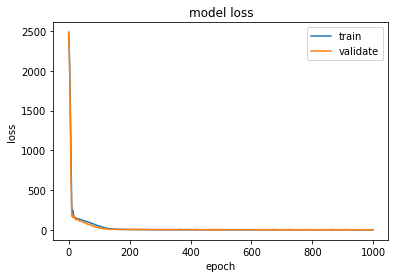

1000/1 - 0s - loss: 1.6683
loss = 2.386

Display the model prediction against the ground truth from test data



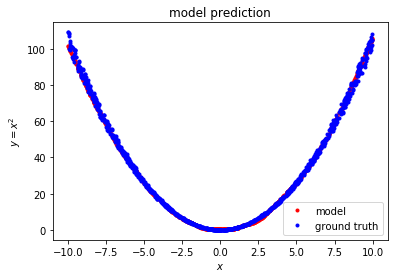


Display the difference between the model prediction and the ground truth from test data



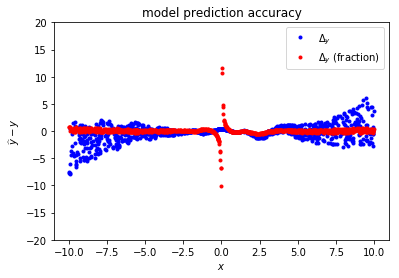

In [112]:
import matplotlib.pyplot as plt

print("\033[1mDisplay the evolution of the loss as a function of the training epoch\033[0m\n")
print("  N(Epochs)        = ", Nepochs)
#print("  loss (train)     = ", history.history['loss'])
#print("  loss (test)      = ", history.history['val_loss'])

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.clf()

# having finished training the model, use this to evaluate the performance on an
# independent sample of test data
loss = model.evaluate(x_test,  y_test, verbose=2)
print("loss = {:5.3f}".format(loss))

print("\n\033[1mDisplay the model prediction against the ground truth from test data\033[0m\n")

#
# use the model to make predictions based on the unseen test data
#
y_predict = model.predict(x_test)
plt.plot(x_test, y_predict, "r.")
plt.plot(x_test, y_test, "b.")
plt.title('model prediction')
plt.ylabel('$y=x^{2}$')
plt.xlabel('$x$')
plt.legend(['model', 'ground truth'], loc='lower right')
plt.show()
plt.clf()

print("\n\033[1mDisplay the difference between the model prediction and the ground truth from test data\033[0m\n")

delta = []
deltapc = []
for i in range(len(y_predict)):
    thedelta = y_predict[i]-y_test[i]
    delta.append( thedelta )
    if( x_test[i] ):
       deltapc.append( thedelta /  x_test[i] )
    else:
       deltapc.append( 0.0 )
    
plt.plot(x_test, delta, "b.")
plt.plot(x_test, deltapc, "r.")
plt.legend(['$\Delta_y$', '$\Delta_y$ (fraction)'], loc='upper right')
plt.title('model prediction accuracy')
plt.ylabel('$\widehat{y}-y$')
plt.xlabel('$x$')
plt.ylim(-20, 20)
plt.show()